In [1]:
import pandas as pd
import seaborn as sns

In [2]:
simulation_data_file = "../gym_ACAS2D/models/logs/testing_ACAS2D_PPO_1048576_5_100.csv"

In [3]:
simulation = pd.read_csv(simulation_data_file)

In [4]:
simulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Episode                 100 non-null    int64  
 1   Outcome                 100 non-null    object 
 2   Total Reward            100 non-null    float64
 3   Time Steps              100 non-null    int64  
 4   Path Length             100 non-null    float64
 5   Closest Approach        100 non-null    float64
 6   Final Distance to Goal  100 non-null    float64
 7   Path                    100 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 6.4+ KB


In [5]:
simulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Episode                 100 non-null    int64  
 1   Outcome                 100 non-null    object 
 2   Total Reward            100 non-null    float64
 3   Time Steps              100 non-null    int64  
 4   Path Length             100 non-null    float64
 5   Closest Approach        100 non-null    float64
 6   Final Distance to Goal  100 non-null    float64
 7   Path                    100 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 6.4+ KB


In [6]:
simulation.head()

,Episode,Outcome,Total Reward,Time Steps,Path Length,Closest Approach,Final Distance to Goal,Path
0,1,Goal,1138.411366,799,957.6,170.505945,95.939966,"[(48, 400.0), (49.19999783845168, 399.99772234..."
1,2,Goal,1388.223862,635,760.8,184.399259,95.579647,"[(48, 400.0), (49.19813193283931, 399.93306815..."
2,3,Goal,1282.352176,642,769.2,164.545408,95.596696,"[(48, 400.0), (49.199999931340926, 400.0004059..."
3,4,Timeout,56.609670,1200,1438.8,185.352881,290.151732,"[(48, 400.0), (49.19932476129198, 400.04025067..."
4,5,Goal,1139.241618,837,1003.2,166.236265,95.193871,"[(48, 400.0), (49.19647253536652, 399.90805723..."


In [7]:
simulation.describe()

,Episode,Total Reward,Time Steps,Path Length,Closest Approach,Final Distance to Goal
count,100.000000,100.000000,100.000000,100.0000,100.000000,100.000000
mean,50.500000,1151.399778,784.850000,940.6200,167.097524,102.360560
std,29.011492,206.868342,146.396333,175.6756,7.900534,39.790986
min,1.000000,51.873240,635.000000,760.8000,155.266614,94.826357
25%,25.750000,1133.386480,655.500000,785.4000,160.732247,95.144739
50%,50.500000,1153.942659,757.000000,907.2000,166.451501,95.524195
75%,75.250000,1240.914790,829.750000,994.5000,171.937352,95.759357
max,100.000000,1424.129540,1200.000000,1438.8000,190.076010,367.221306


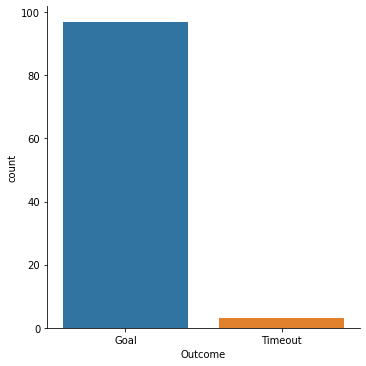

In [8]:
sns.catplot(x="Outcome", data=simulation, kind="count")

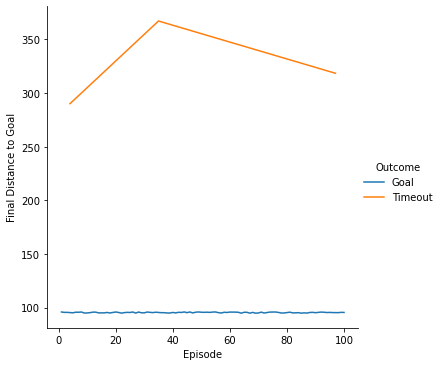

In [9]:
sns.relplot(x="Episode", y="Final Distance to Goal", data=simulation, 
            kind ="line", 
            hue="Outcome")

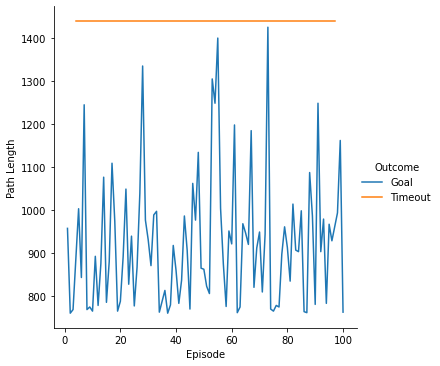

In [10]:
sns.relplot(x="Episode", y="Path Length", data=simulation, 
            kind ="line", 
            hue="Outcome")

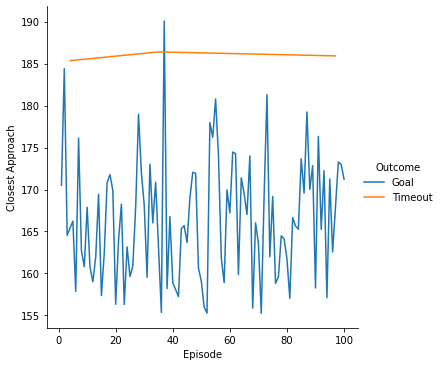

In [11]:
sns.relplot(x="Episode", y="Closest Approach", data=simulation, 
            kind ="line", 
            hue="Outcome")

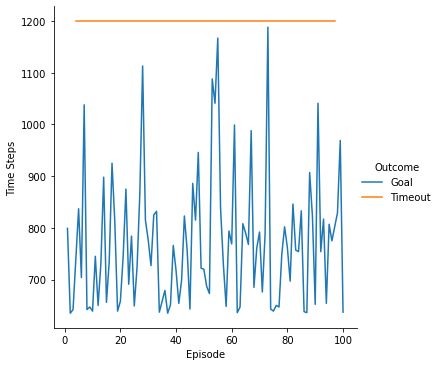

In [12]:
sns.relplot(x="Episode", y="Time Steps", data=simulation, 
            kind ="line", 
            hue="Outcome")

<AxesSubplot:xlabel='Outcome', ylabel='Time Steps'>

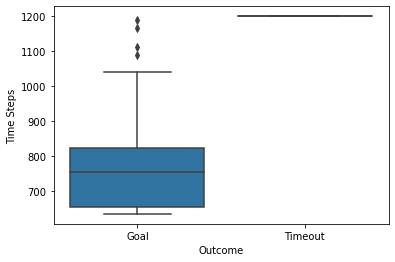

In [13]:
sns.boxplot(x="Outcome", y="Time Steps", data=simulation)

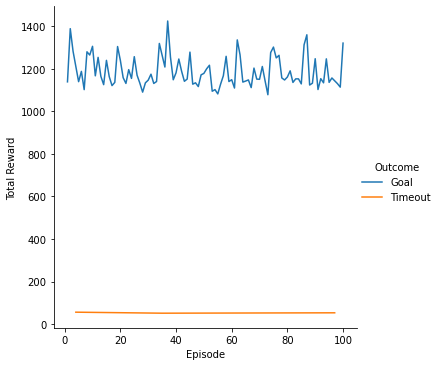

In [14]:
sns.relplot(x="Episode", y="Total Reward", data=simulation, 
            kind ="line", 
            hue="Outcome")

<AxesSubplot:xlabel='Outcome', ylabel='Total Reward'>

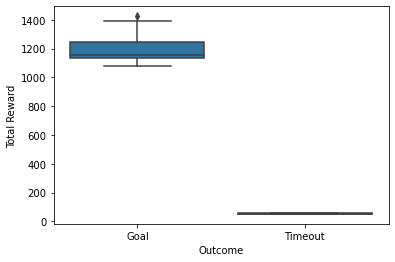

In [15]:
sns.boxplot(x="Outcome", y="Total Reward", data=simulation)

In [16]:
# Create paths dataframe

import ast

paths_df = pd.DataFrame()

e_values, o_values, x_values, y_values = [], [], [], []
for index, row in simulation.iterrows():
    for (x, y) in ast.literal_eval(row["Path"]):
        e_values.append(row["Episode"])
        o_values.append(row["Outcome"])
        x_values.append(x)
        y_values.append(-y)

paths_df["Episode"] = e_values
paths_df["Outcome"] = o_values
paths_df["x"] = x_values
paths_df["y"] = y_values

In [17]:
paths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78485 entries, 0 to 78484
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Episode  78485 non-null  int64  
 1   Outcome  78485 non-null  object 
 2   x        78485 non-null  float64
 3   y        78485 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.4+ MB


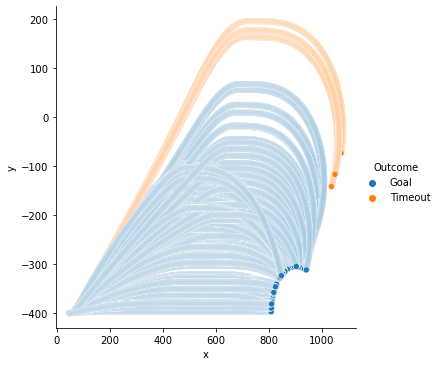

In [18]:
sns.relplot(x="x", y="y", hue="Outcome", kind="scatter", data=paths_df)

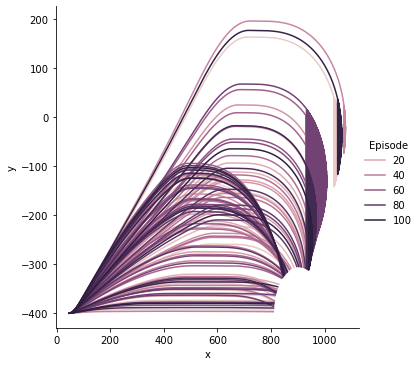

In [19]:
sns.relplot(x="x", y="y", hue="Episode", kind="line", data=paths_df)